# ***Actividad 1***

## Contexto

La insuficiencia cardíaca es una condición crónica y progresiva en la cual el corazón no puede bombear suficiente sangre para satisfacer las necesidades del cuerpo. Esta enfermedad afecta a millones de personas en todo el mundo y es una de las principales causas de hospitalización y mortalidad. Un dataset de insuficiencia cardíaca se utiliza para estudiar los factores que contribuyen a esta enfermedad, predecir los resultados de los pacientes y desarrollar intervenciones eficaces.

## Objetivo

Poder realizar una predicción con los datos que se tienen como variables del dataset, mediante la elección adecuada de modelos estadísticos, para predecir si una persona puede tener insuficiencia cardíaca o no.

## Explicación de las columnas del dataset

- Descripción de las columnas en general

  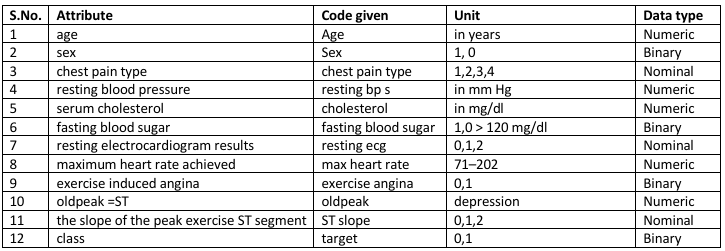

- Descripción de las variables categoricas

  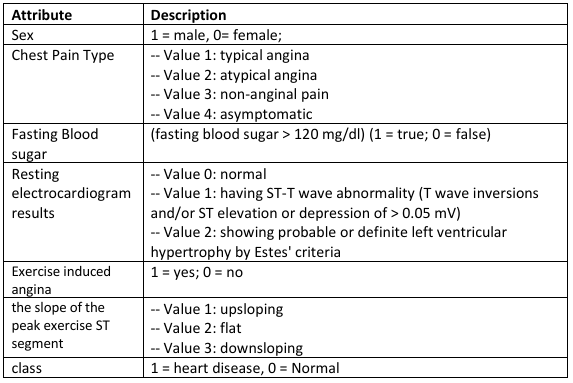

#### Fuente del dataset

La fuente del dataset escogido fue de una libreria de datasets libres de medicina

https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive

## Importación de librerías



In [3]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga del dataset

In [4]:
# Ruta del archivo en Google Drive
file_path = '/content/heart_statlog_cleveland_hungary_final.csv'

# Lectura del archivo CSV en un DataFrame de Pandas
df = pd.read_csv(file_path)


### Visualización inicial del dataframe

#### Indicar el tamaño del conjunto de datos

In [5]:
print(f"El número de filas son {df.shape[0]}")
print(f"El número de columnas son {df.shape[1]}")

El número de filas son 1190
El número de columnas son 12


In [6]:
# Visualizando las columnas
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [7]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [8]:
df.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


## Verificando tipos de columnas

### Especificar las variables de cada tipo

In [9]:
# Observando que tipos de columnas tenemos en el dataframe
df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

### Cambio de nombre a las variables

In [10]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [11]:
# Copiando dataframe para realizar cambios
df_new = df.copy()

# Cambiar el nombre de las columnas reemplazando los espacios por "_"
df_new.columns = df_new.columns.str.replace(' ', '_')

# Verificando los nombres de las columnas
df_new.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope', 'target'],
      dtype='object')

- Como podemos observar, las columnas se ecuentran como valores tipo enteros o decimales. Por lo cual se va a proceder a cambiar los tipos binarios o categoricos a valores de tipo texto.

In [12]:
# Creando lista de las columnas con valores de tipo categorico
list_categoric = ['sex','chest_pain_type','fasting_blood_sugar','resting_ecg','exercise_angina','ST_slope', 'target']

for column in list_categoric:
  #pasando a texto
  df_new[column] = df_new[column].astype(str)
  # Pasando de texto a numerico para luego ser texto y quitar valores que no sean de las categorias
  df_new[column] = pd.to_numeric(df_new[column], errors='coerce')
  #Pasando a texto
  df_new[column] = df_new[column].astype(str)

# Observando que tipos de columnas tenemos en el dataframe
df_new.dtypes

age                      int64
sex                     object
chest_pain_type         object
resting_bp_s             int64
cholesterol              int64
fasting_blood_sugar     object
resting_ecg             object
max_heart_rate           int64
exercise_angina         object
oldpeak                float64
ST_slope                object
target                  object
dtype: object

In [13]:
# Verificando valores de la columna "exterior_view"
for column in list_categoric:
    # Imprimiendo nombre de la columna
    print(f"Columna: {column}")

    # Imprimiendo los valores unicos de las columnas categoricas
    print(df_new[column].unique())

Columna: sex
['1' '0']
Columna: chest_pain_type
['2' '3' '4' '1']
Columna: fasting_blood_sugar
['0' '1']
Columna: resting_ecg
['0' '1' '2']
Columna: exercise_angina
['0' '1']
Columna: ST_slope
['1' '2' '3' '0']
Columna: target
['0' '1']


## Limpieza de datos

### Verificar la existencia de duplicados

In [14]:
#Verificando valores duplicados
print(f"Existen {df_new.duplicated().sum()} valores duplicados")

Existen 272 valores duplicados


In [15]:
#Eliminando datos duplicados
df_non_duplicated = df_new.drop_duplicates()

#Verificando valores duplicados
print(f"Numero de valores duplicados {df_non_duplicated.duplicated().sum()}")
print(f"Numero de filas del dataframe nuevo {df_non_duplicated.shape[0]}")
print(f"Numero de filas del dataframe anterior {df_new.shape[0]}")
print(f"Se eliminaron el {100 - (round(df_non_duplicated.shape[0]/df_new.shape[0]*100, 2))}%")

Numero de valores duplicados 0
Numero de filas del dataframe nuevo 918
Numero de filas del dataframe anterior 1190
Se eliminaron el 22.86%


### Determinar si hay valores faltantes en al menos un atributo categórico o numérico

In [16]:
#Iterando sobre las columnas para verificar valores faltantes
for column in df_non_duplicated.columns:
    # Imprimiendo el número de valores faltantes en cada columna
    print(f"En la colomna {column} hay: {df_non_duplicated[column].isna().sum()} valores faltantes")

En la colomna age hay: 0 valores faltantes
En la colomna sex hay: 0 valores faltantes
En la colomna chest_pain_type hay: 0 valores faltantes
En la colomna resting_bp_s hay: 0 valores faltantes
En la colomna cholesterol hay: 0 valores faltantes
En la colomna fasting_blood_sugar hay: 0 valores faltantes
En la colomna resting_ecg hay: 0 valores faltantes
En la colomna max_heart_rate hay: 0 valores faltantes
En la colomna exercise_angina hay: 0 valores faltantes
En la colomna oldpeak hay: 0 valores faltantes
En la colomna ST_slope hay: 0 valores faltantes
En la colomna target hay: 0 valores faltantes


### Determinar si hay valores fuera de rango en al menos un atributo numérico

In [17]:
# Creando nuevo dataframe para eliminación de outliers
df_filtered = df_non_duplicated.copy()

In [18]:
#Creando una función para ver los boxplots de las columnas numericas
def plot_numeric_boxplots(df):
    # Seleccionar columnas numéricas
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Calcular el número de filas y columnas para los subplots
    n_cols = 3  # Número de columnas por fila
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

    # Crear la figura y los subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 3*n_rows))

    # Ajustar el espacio entre los subplots
    fig.subplots_adjust(hspace=0.5)

    # Aplanar el array de ejes si es necesario
    axes = axes.flatten() if n_rows > 1 else [axes]

    # Iterar sobre las columnas numéricas
    for i, column in enumerate(numeric_columns):
        # Gráfico de caja
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('')

    # Ocultar subplots vacíos si los hay
    for j in range(len(numeric_columns), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

#### Valores atípicos

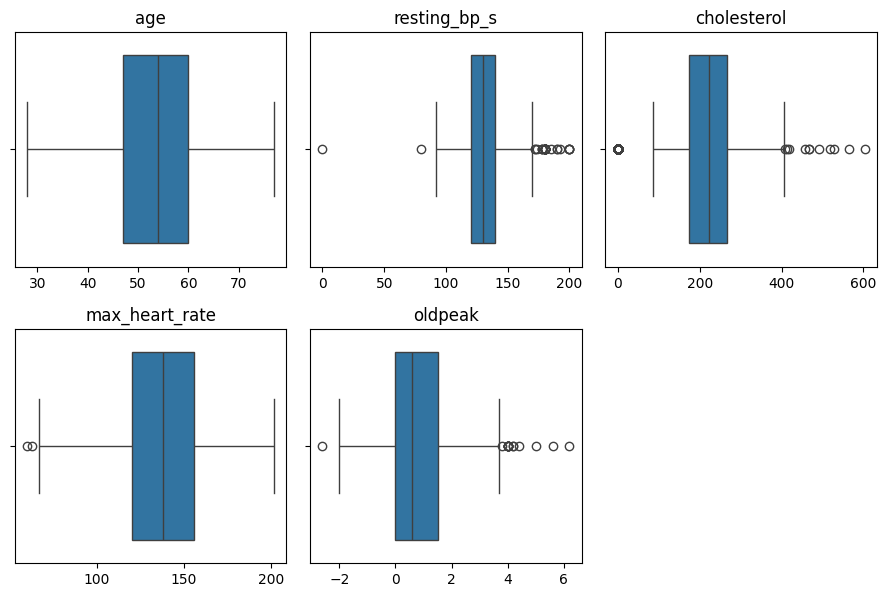

In [19]:
#Creando grafico de las columnas del dataframe sin duplicados ni valores faltantes
graf_filtered = plot_numeric_boxplots(df_filtered)
graf_filtered

In [20]:
def detectar_outliers(df):
    outliers_dict = {}

    # Seleccionar solo las columnas numéricas
    numeric_columns = df.select_dtypes(exclude=['object']).columns

    for column in numeric_columns:
        # Calcular Q1, Q3 e IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Definir los límites para los outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detectar outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].tolist()
        outliers_dict[column] = outliers

    return outliers_dict

In [21]:
# Usar la función para detectar outliers en las columnas del dataframe
outliers = detectar_outliers(df_filtered)

# Capturando los nombres de las columnas que son de tipo númerico
numeric_columns = df_filtered.select_dtypes(exclude=['object']).columns

# Iterando en la lista de columnas númericas para obtener el número de valores atípicos
for column in numeric_columns:

    # Imprimiendo los números de valores atípicos de las columnas numericas
    print(f"En la columna {column} hay {len(outliers[column])} valores atípicos y representa el {round(len(outliers[column])/df_filtered[column].count()*100, 2)}% de los datos")


En la columna age hay 0 valores atípicos y representa el 0.0% de los datos
En la columna resting_bp_s hay 28 valores atípicos y representa el 3.05% de los datos
En la columna cholesterol hay 183 valores atípicos y representa el 19.93% de los datos
En la columna max_heart_rate hay 2 valores atípicos y representa el 0.22% de los datos
En la columna oldpeak hay 16 valores atípicos y representa el 1.74% de los datos


In [22]:
# Copiando dataframe antes de realizar cambios de valores atípicos
df_modified = df_filtered.copy()

# Capturando la media de cada columna númerica
mediana = {}

for column in numeric_columns:

    median = df_modified[column].median()

    mediana[column] = median


# Capturando la media de los las columnas
for column in numeric_columns:
    # Capturando lista de valores a cambiar de la columna
    outliers_column = outliers[column]

    # Cambiando los valores atípicos por su media
    df_modified.loc[df_modified[column].isin(outliers_column), column] = mediana[column]

# Usar la función para detectar outliers en las columnas del dataframe
outliers = detectar_outliers(df_modified)

# Iterando en la lista de columnas númericas para obtener el número de valores atípicos
for column in numeric_columns:

    # Imprimiendo los números de valores atípicos de las columnas numericas
    print(f"En la columna {column} hay {len(outliers[column])} valores atípicos y representa el {round(len(outliers[column])/df_filtered[column].count()*100, 2)}% de los datos")

En la columna age hay 0 valores atípicos y representa el 0.0% de los datos
En la columna resting_bp_s hay 0 valores atípicos y representa el 0.0% de los datos
En la columna cholesterol hay 39 valores atípicos y representa el 4.25% de los datos
En la columna max_heart_rate hay 0 valores atípicos y representa el 0.0% de los datos
En la columna oldpeak hay 0 valores atípicos y representa el 0.0% de los datos


- La cantidad de valores atipicos ya es muy baja.

#### Valores atípicos finales

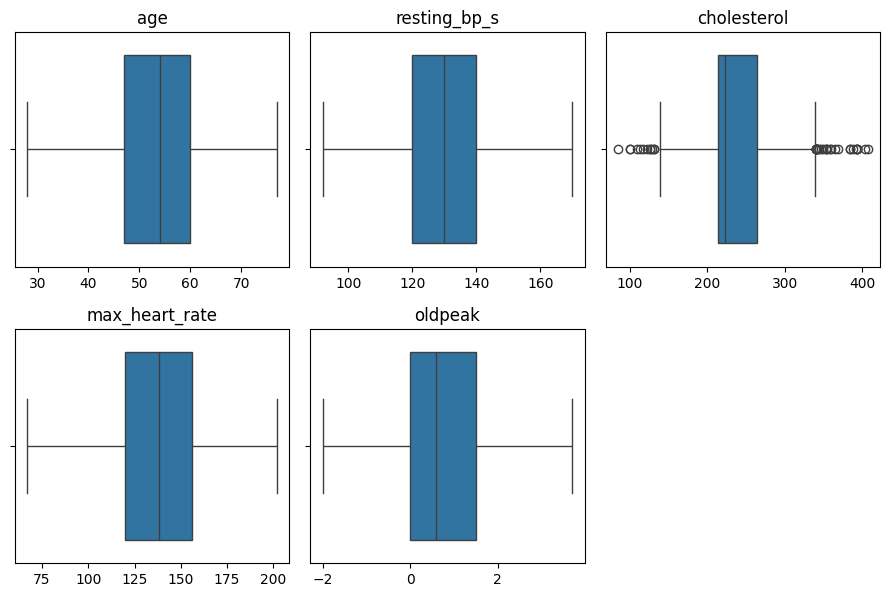

In [23]:
# Creando grafico de las columnas del dataframe sin duplicados ni valores faltantes
graf_modified = plot_numeric_boxplots(df_modified)
graf_modified

## Calcular estadísticas de una variable numérica y otra categórica

In [24]:
# Utilizando describe para verificar las estadisticas de las variables numéricas
df_modified.describe()

,age,resting_bp_s,cholesterol,max_heart_rate,oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,131.079521,237.442266,136.976035,0.829412
std,9.432617,15.597206,46.339984,25.215656,0.958009
min,28.000000,92.000000,85.000000,67.000000,-2.000000
25%,47.000000,120.000000,214.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,264.000000,156.000000,1.500000
max,77.000000,170.000000,407.000000,202.000000,3.700000


In [25]:
# Creando lista de category_cols
category_cols = df_modified.select_dtypes(include=['object']).columns

# Iterando en cada columna categorica para determinar sus estadisticas
for col in category_cols:
    print(f"\nAnálisis de la columna categórica: '{col}'")

    # Calcular frecuencias y proporciones
    freq = df_modified[col].value_counts()
    prop = df_modified[col].value_counts(normalize=True)

    # Combinar frecuencias y proporciones en un DataFrame
    stats = pd.DataFrame({'Frecuencia': freq, 'Proporción': prop})
    stats['Proporción'] = stats['Proporción'].map('{:.2%}'.format)

    print(stats)


Análisis de la columna categórica: 'sex'
     Frecuencia Proporción
sex                       
1           725     78.98%
0           193     21.02%

Análisis de la columna categórica: 'chest_pain_type'
                 Frecuencia Proporción
chest_pain_type                       
4                       496     54.03%
3                       203     22.11%
2                       173     18.85%
1                        46      5.01%

Análisis de la columna categórica: 'fasting_blood_sugar'
                     Frecuencia Proporción
fasting_blood_sugar                       
0                           704     76.69%
1                           214     23.31%

Análisis de la columna categórica: 'resting_ecg'
             Frecuencia Proporción
resting_ecg                       
0                   552     60.13%
2                   188     20.48%
1                   178     19.39%

Análisis de la columna categórica: 'exercise_angina'
                 Frecuencia Proporción
exercise_angin

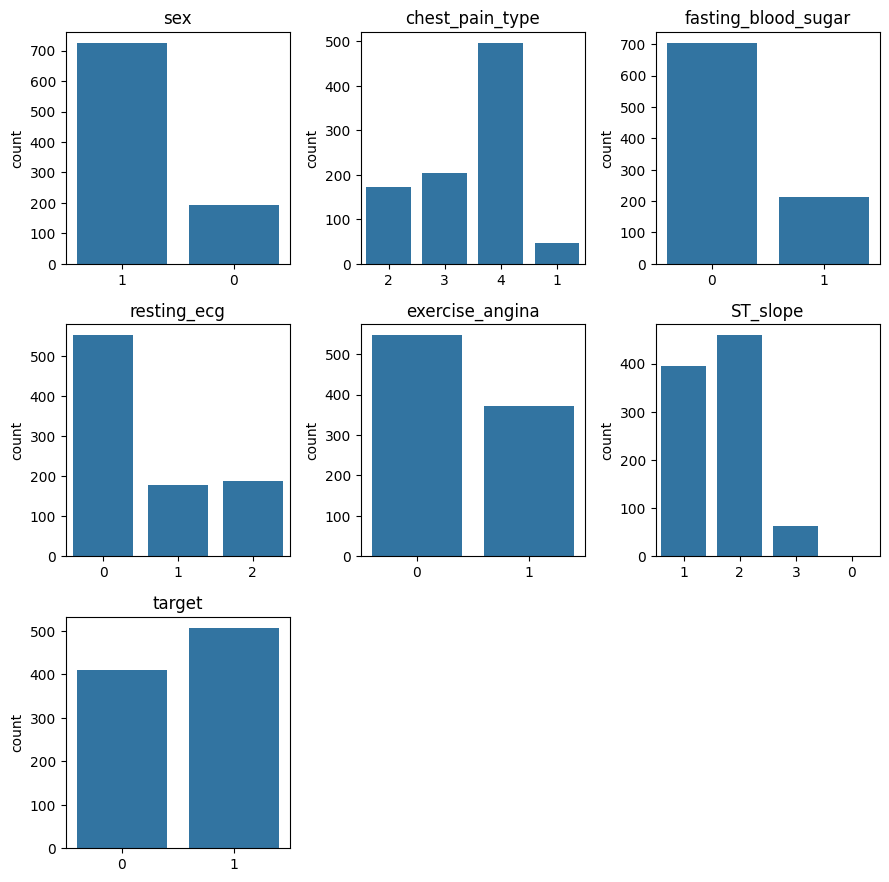

In [26]:
# Calcular el número de filas y columnas para los subplots
n_cols = 3  # Número de columnas por fila
n_rows = (len(category_cols) + n_cols - 1) // n_cols

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 3*n_rows))

# Ajustar el espacio entre los subplots
fig.subplots_adjust(hspace=0.5)

# Aplanar el array de ejes si es necesario
axes = axes.flatten() if n_rows > 1 else [axes]

# Iterar sobre las columnas numéricas
for i, column in enumerate(category_cols):
    # Gráfico de caja
    sns.countplot(x=df_modified[column], ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')

# Ocultar subplots vacíos si los hay
for j in range(len(category_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Balanceo de la Variable Objetivo

In [27]:
df_modified.groupby('target').size()

target
0    410
1    508
dtype: int64

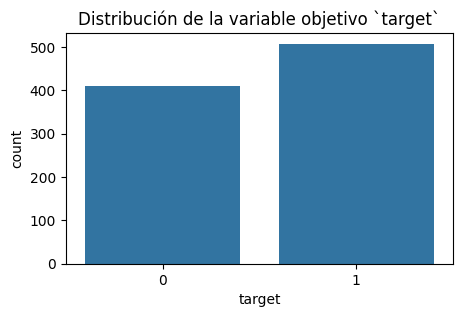

In [28]:
# Revisar la distribución actual de la variable 'target'

plt.figure(figsize=(5, 3))

sns.countplot(x='target', data=df_modified)

plt.title('Distribución de la variable objetivo `target`')
plt.show()

In [29]:
from sklearn.utils import resample

# Separamos el dataframe en los valores de la columna target
majority = df_modified[df_modified["target"] == "0"]
minority =df_modified[df_modified["target"] == "1"]

# Realizamos un sobremuestreo de la clase minoritaria
minority_reesample = resample(minority,replace=True,n_samples=len(majority),random_state=42)

# Combinamos la clase mayoritaria con la minoritaria sobremuestreada
df_reesample = pd.concat([majority, minority_reesample])

# Realizamos un checkeo de la variable target
df_reesample["target"].value_counts()

target
0    410
1    410
Name: count, dtype: int64

In [30]:
df_reesample.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
2,37,1,2,130,283,0,1,98,0,0.0,1,0
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0


## Graficos

### Realizar el diagrama de barras de al menos una variable categórica

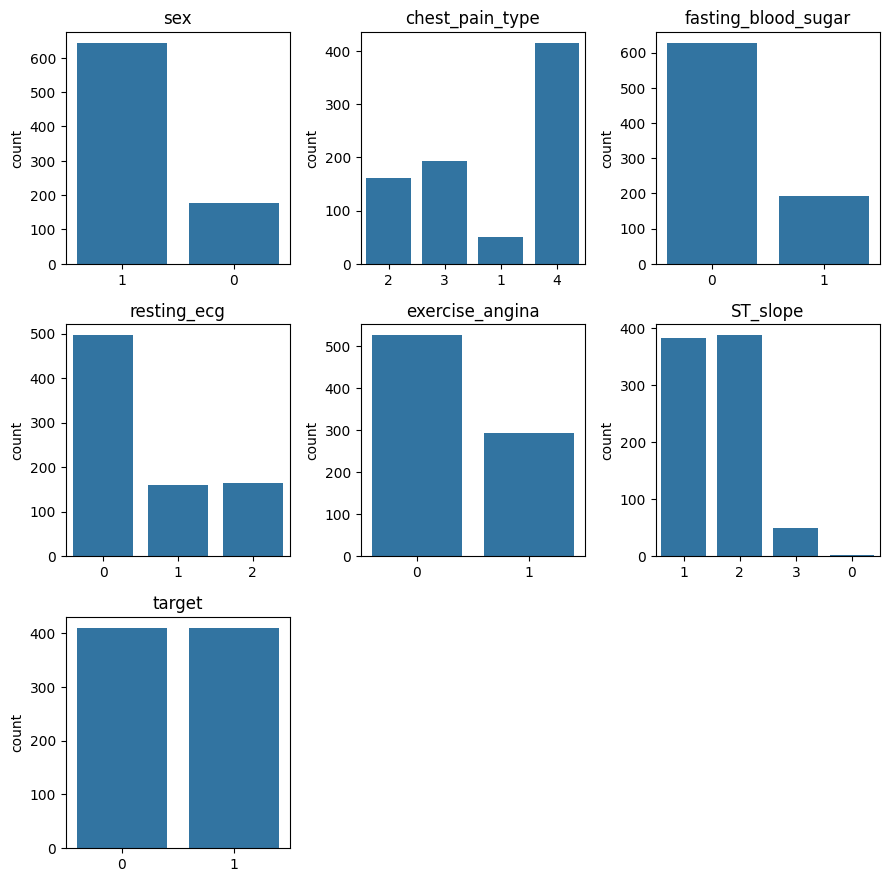

In [31]:
# Calcular el número de filas y columnas para los subplots
n_cols = 3  # Número de columnas por fila
n_rows = (len(category_cols) + n_cols - 1) // n_cols

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 3*n_rows))

# Ajustar el espacio entre los subplots
fig.subplots_adjust(hspace=0.5)

# Aplanar el array de ejes si es necesario
axes = axes.flatten() if n_rows > 1 else [axes]

# Iterar sobre las columnas numéricas
for i, column in enumerate(category_cols):
    # Gráfico de caja
    sns.countplot(x=df_reesample[column], ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')

# Ocultar subplots vacíos si los hay
for j in range(len(category_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

### Realizar el histograma de al menos una variable numérica

In [32]:
df_reesample.select_dtypes(include=["float", "int"]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 820 entries, 0 to 652
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             820 non-null    int64  
 1   resting_bp_s    820 non-null    int64  
 2   cholesterol     820 non-null    int64  
 3   max_heart_rate  820 non-null    int64  
 4   oldpeak         820 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 38.4 KB


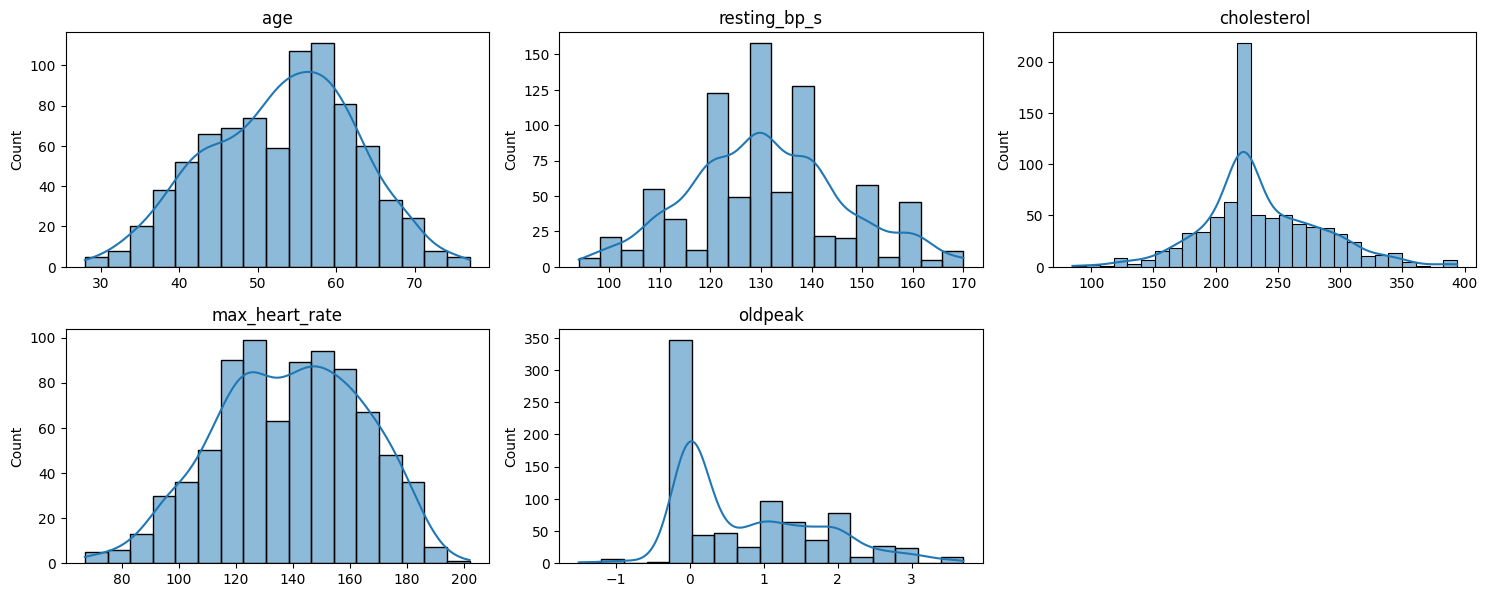

In [33]:
# Seleccionar columnas numéricas
numeric_columns = df_reesample.select_dtypes(include=["float", "int"]).columns

# Calcular el número de filas y columnas para los subplots
n_cols = 3  # Número de columnas por fila
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3*n_rows))

# Ajustar el espacio entre los subplots
fig.subplots_adjust(hspace=0.5)

# Aplanar el array de ejes si es necesario
axes = axes.flatten() if n_rows > 1 else [axes]

# Iterar sobre las columnas numéricas
for i, column in enumerate(numeric_columns):
    # Gráfico de caja
    sns.histplot(x=df_reesample[column], ax=axes[i] , kde=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')

# Ocultar subplots vacíos si los hay
for j in range(len(numeric_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

### Generar diagramas de dispersión

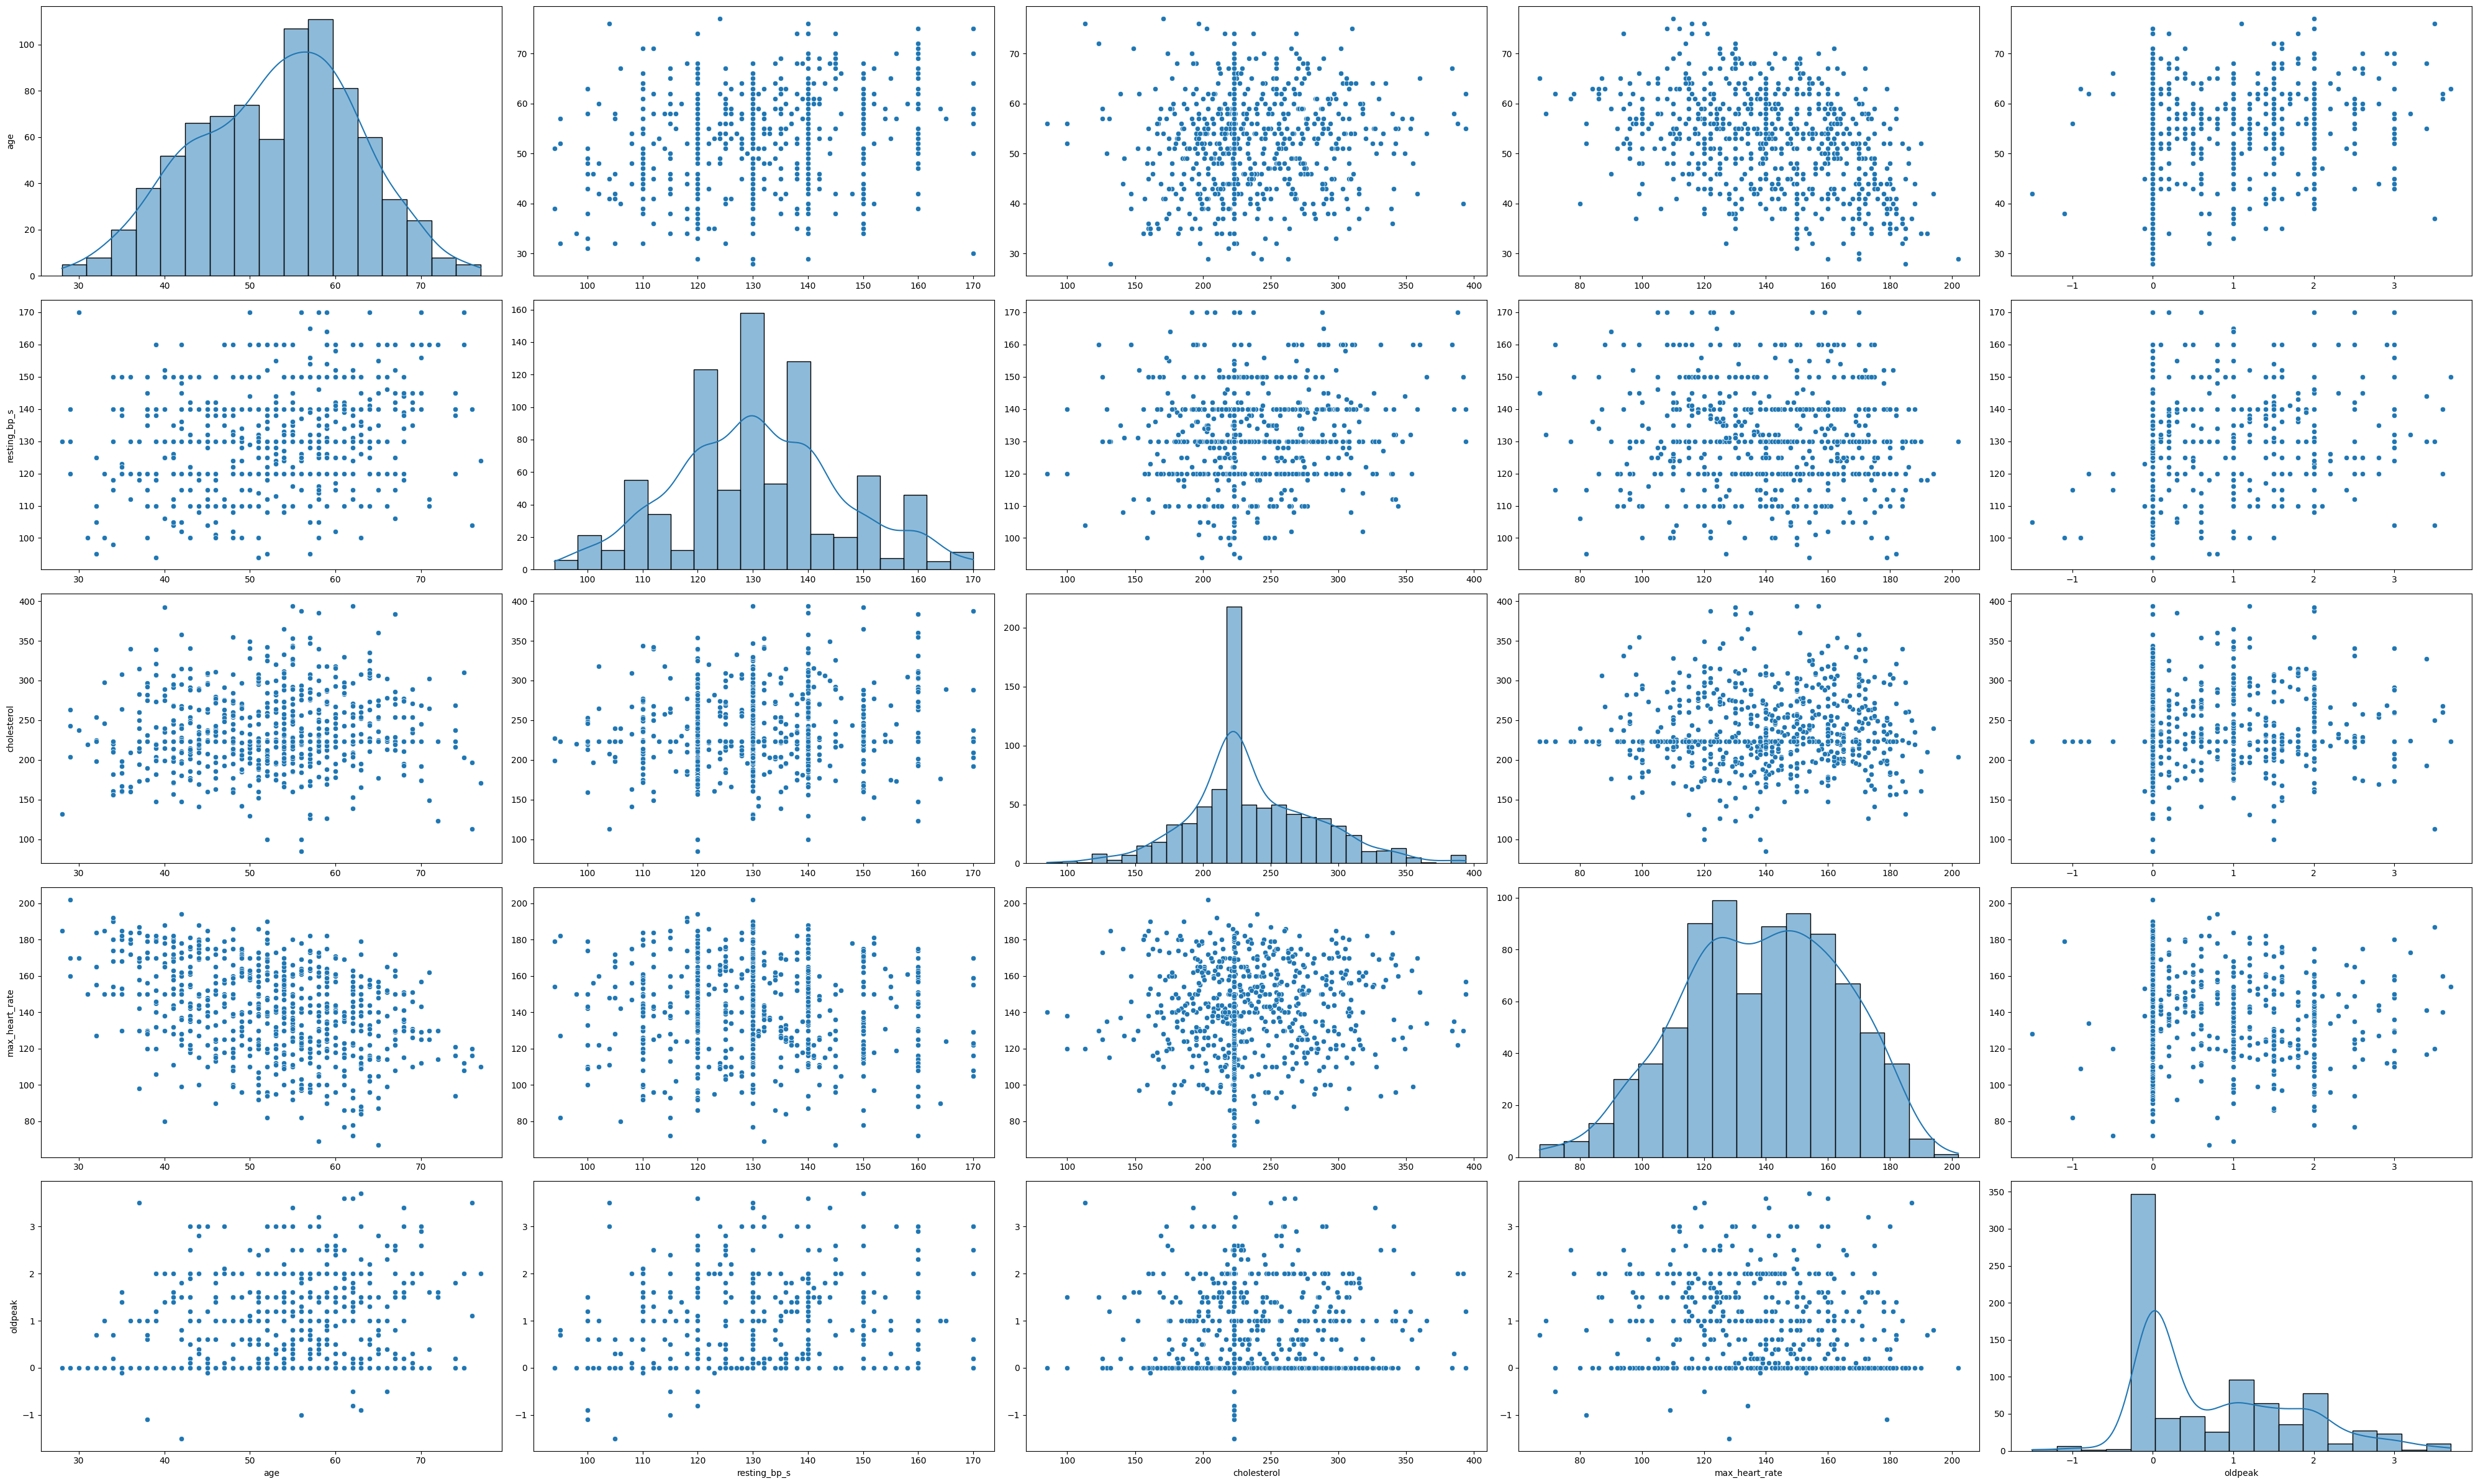

In [34]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_reesample.select_dtypes(include=["float64", "int"]).columns

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=len(numeric_columns), figsize=(40, 24))

# Iterar sobre todas las combinaciones de columnas numéricas
for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        ax = axes[i, j]

        if i != j:
            # Crear diagrama de dispersión
            sns.scatterplot(data=df_reesample, x=col2, y=col1, ax=ax)
        else:
            # Crear histograma en la diagonal
            sns.histplot(data=df_reesample, x=col1, ax=ax, kde=True)

        # Ajustar etiquetas
        if i == len(numeric_columns) - 1:
            ax.set_xlabel(col2)
        else:
            ax.set_xlabel('')

        if j == 0:
            ax.set_ylabel(col1)
        else:
            ax.set_ylabel('')

# Ajustar el diseño
plt.tight_layout()
plt.show()

### Realizar correlación entre variables

In [35]:
def analyze_correlation(df, method='pearson', figsize=(12, 8)):
    # Seleccionar solo las columnas numéricas
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Calcular la matriz de correlación
    corr_matrix = numeric_df.corr(method=method)

    # Crear la figura
    plt.figure(figsize=figsize)

    # Crear el mapa de calor
    fig = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

    # Configurar el título
    plt.title(f'Matriz de Correlación {method.capitalize()}', fontsize=16)

    # Mostrar el gráfico
    plt.show()

    return fig

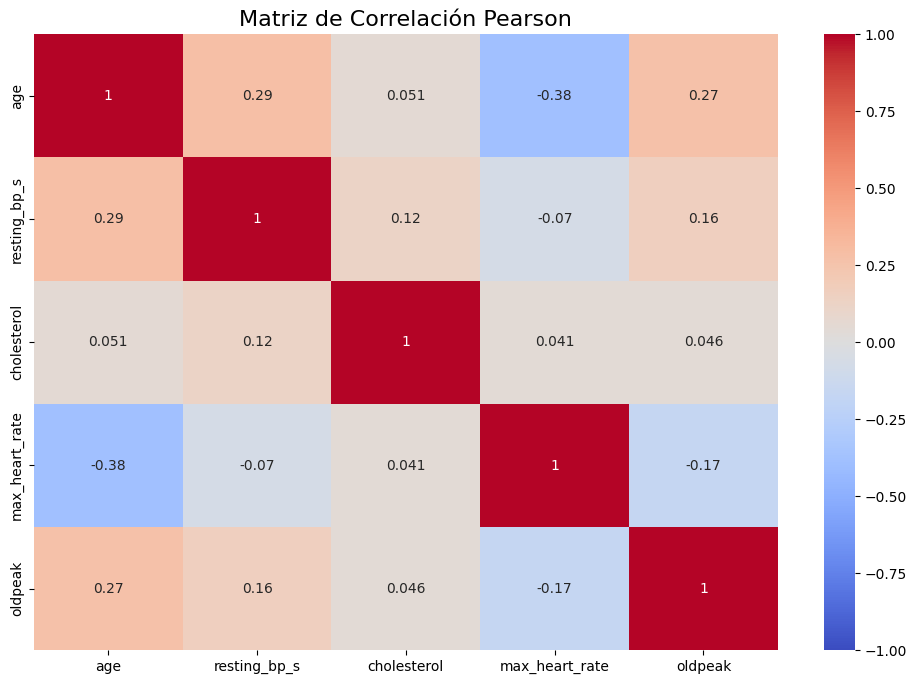

<Axes: title={'center': 'Matriz de Correlación Pearson'}>

In [36]:
analyze_correlation(df_reesample)

## Mapeo de columnas categoricas

### Mapear columnas categoricas

In [37]:
# Identificando las columnas tipo categoricas
df_reesample.select_dtypes(include=['object']).columns

Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg',
       'exercise_angina', 'ST_slope', 'target'],
      dtype='object')

In [38]:
# Dividimos el dataframe
X = df_reesample.drop(['target'], axis=1)
Y = df_reesample['target']

# Visualizamos X
X.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope
0,40,1,2,140,289,0,0,172,0,0.0,1
2,37,1,2,130,283,0,1,98,0,0.0,1
4,54,1,3,150,195,0,0,122,0,0.0,1
5,39,1,3,120,339,0,0,170,0,0.0,1
6,45,0,2,130,237,0,0,170,0,0.0,1


### Uso de One-Hot Encoding

In [39]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Seleccionar solo las columnas numéricas
numeric_columns = X.select_dtypes(include=["float64", "int"]).columns

# Seleccionar solo las columnas numéricas
categoric_columns = X.select_dtypes(exclude=["float64", "int"]).columns

# Definir transformaciones para columnas categóricas y numéricas
categorical_transformer = Pipeline(
    steps=[
        # Imputar valores faltantes con la moda
        ('imputer', SimpleImputer(strategy='most_frequent')),

        # Codificar variables categóricas con One-Hot
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

numeric_transformer = Pipeline(
    steps=[
        # Imputar valores faltantes con la media
        ('imputer', SimpleImputer(strategy='mean')),

        # Escalar variables numéricas
        ('scaler', StandardScaler())
    ]
)

# Combinar transformaciones para todas las columnas
preprocessor = ColumnTransformer(
    transformers=[
        # Aplicar transformaciones numéricas a columnas numéricas
        ('num', numeric_transformer, numeric_columns),

        # Aplicar transformaciones categóricas a columnas categóricas
        ('cat', categorical_transformer, categoric_columns)
    ]
)

# Aplicar transformación al DataFrame
transformed_data = preprocessor.fit_transform(X)

# Obtener los nombres de las columnas después de aplicar OneHotEncoder
categorical_features = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(input_features=categoric_columns)

# Unir las matrices transformadas en un DataFrame
x_transformed = pd.DataFrame(transformed_data, columns=np.concatenate((numeric_columns, categorical_features)))

# Mostrar el DataFrame transformado
x_transformed.head()

,age,resting_bp_s,cholesterol,max_heart_rate,oldpeak,sex_0,sex_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,...,fasting_blood_sugar_1,resting_ecg_0,resting_ecg_1,resting_ecg_2,exercise_angina_0,exercise_angina_1,ST_slope_0,ST_slope_1,ST_slope_2,ST_slope_3
0,-1.400597,0.578825,1.102100,1.307434,-0.834003,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.719917,-0.073866,0.974974,-1.607048,-0.834003,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.089565,1.231516,-0.889551,-0.661810,-0.834003,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-1.507037,-0.726556,2.161489,1.228664,-0.834003,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.868396,-0.073866,0.000336,1.228664,-0.834003,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Obtención de importancia de columnas

### Variables categoricas

In [40]:
from sklearn.model_selection import train_test_split

# Dividimos la data en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, random_state = 1,stratify = Y)

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Ajustar y transformar el conjunto de entrenamiento
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transformar el conjunto de prueba
X_test_preprocessed = preprocessor.transform(X_test)

# Entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(criterion='gini', class_weight={"0": 0.15, "1": 0.85}, random_state=1)
model.fit(X_train_preprocessed, y_train)

# Obtener las importancias de las características del modelo
importances = model.feature_importances_

# Obtener los nombres de las características después del procesamiento
numeric_feature_names = numeric_columns.tolist()
categorical_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categoric_columns).tolist()
feature_names = numeric_feature_names + categorical_feature_names

# Crear un DataFrame para las importancias de las características
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Ordenando dataframe de mayor a menor en importancia
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Establecer el formato de visualización de pandas para números decimales
pd.options.display.float_format = '{:.3f}'.format

print(feature_importances)


                  feature  importance
19             ST_slope_1       0.254
8       chest_pain_type_2       0.137
4                 oldpeak       0.112
2             cholesterol       0.111
3          max_heart_rate       0.102
1            resting_bp_s       0.062
9       chest_pain_type_3       0.057
10      chest_pain_type_4       0.029
5                   sex_0       0.026
15          resting_ecg_2       0.026
6                   sex_1       0.026
11  fasting_blood_sugar_0       0.025
0                     age       0.025
17      exercise_angina_1       0.004
14          resting_ecg_1       0.003
12  fasting_blood_sugar_1       0.000
16      exercise_angina_0       0.000
21             ST_slope_3       0.000
20             ST_slope_2       0.000
13          resting_ecg_0       0.000
7       chest_pain_type_1       0.000
18             ST_slope_0       0.000


<function matplotlib.pyplot.show(close=None, block=None)>

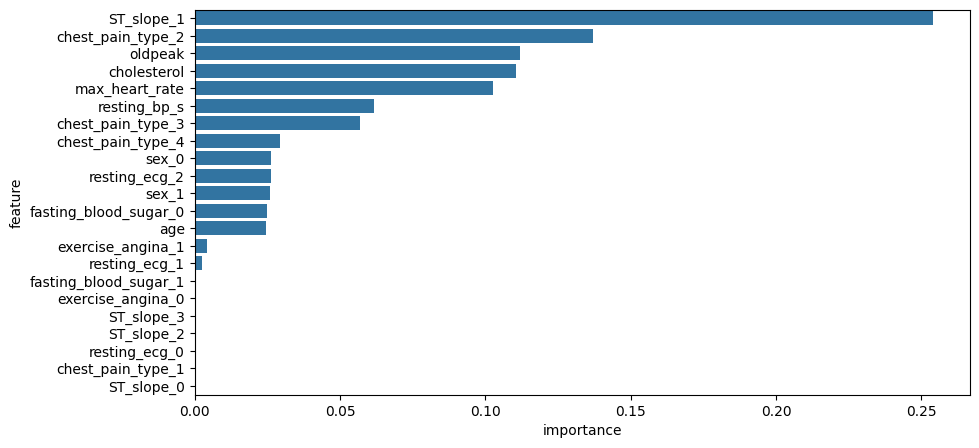

In [42]:
plt.figure( figsize=(10,5))

sns.barplot(data=feature_importances, x="importance", y="feature")

plt.show

### Variables numericas

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleccionar columnas numéricas (int64 y float64)
numeric_columns = X.select_dtypes(include=['int','float'])

# Rellenar valores faltantes con la media de cada columna
for column in numeric_columns.columns:
    mean_value = numeric_columns[column].mean()
    numeric_columns[column].fillna(value=mean_value, inplace=True)

# Estandarizar las características
scaler = StandardScaler()
df_loan_scaled = scaler.fit_transform(numeric_columns)

# Crear un objeto SimpleImputer para manejar valores faltantes
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df_loan_scaled)

# Aplicar PCA
pca = PCA()
pca.fit(df_loan_scaled)

# Calcular la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Calcular la varianza explicada acumulada
cumulative_explained_variance = np.cumsum(explained_variance)

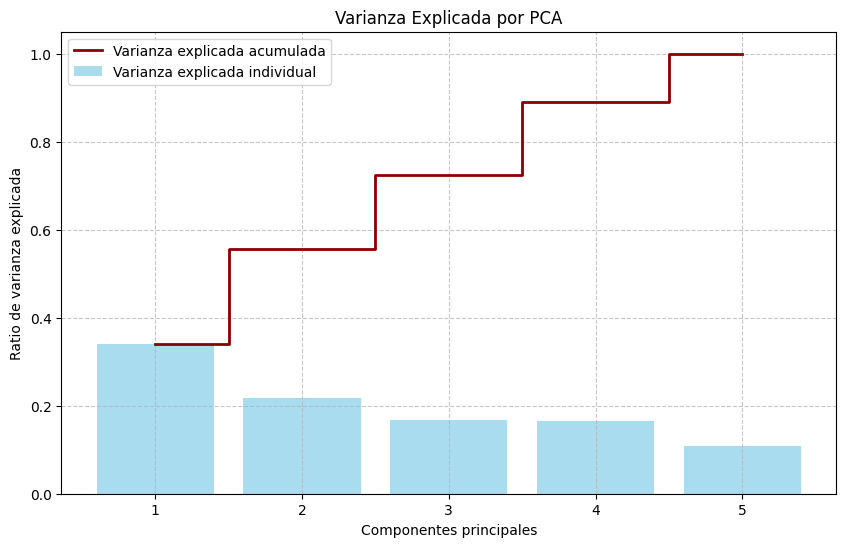

In [44]:
# Crear la gráfica
plt.figure(figsize=(10, 6))

# Gráfico de barras para la varianza explicada individual
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center',
        label='Varianza explicada individual', color='skyblue')

# Gráfico de línea para la varianza explicada acumulada
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid',
         label='Varianza explicada acumulada', color='darkred', linewidth=2)

# Configurar etiquetas y título
plt.ylabel('Ratio de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.title('Varianza Explicada por PCA')

# Añadir cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.show()

In [45]:
# Seleccionar el número de componentes principales
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Crear un nuevo objeto PCA con el número de componentes seleccionado
pca = PCA(n_components=n_components)

# Aplicar PCA a los datos escalados
df_pca = pca.fit_transform(df_loan_scaled)

# Imprimir el número de componentes seleccionados
print(f"Number of components selected: {n_components}")

# Crear un DataFrame con las componentes principales
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(n_components)])

Number of components selected: 5


- Como se puede observar, todas las columnas de tipo numerica del dataframe aportan a la explicación del target; por lo que no se eliminaria alguna columna.

## Conclusión

Después de analizar cuidadosamente los resultados del DecisionTreeClassifier y el PCA, he llegado a la conclusión de que es necesario mantener todas las columnas en nuestro modelo. Aunque algunas variables categóricas como ST_slope_1 y chest_pain_type_2 muestran una mayor importancia, incluso las variables con menor peso pueden aportar información valiosa en ciertos casos o interacciones específicas.

En cuanto a las variables numéricas, el PCA revela que los primeros componentes capturan una gran parte de la varianza, pero no mayor al 90% de los datos. Y a su vez que nuestro objetivo es mantener la máxima información y interpretabilidad posible, considero que es más apropiado conservar todas las variables originales en lugar de reducir la dimensionalidad.

# ***Actividad 2***

## Objetivo

El objetivo es poder probar diferentes modelos y poder verificar cual es el que se adecua mejor a la data y nos da una predicción mejor al momento de evaluarlas.

Dentro de las que podemos utilizar están:

Algoritmos lineales:
- Regresión Logística (LogR)
- Análisis Discriminante Lineal (LDA)

Algoritmos no lineales:
- Árboles de Decisión (CART)
- Bosques Aleatorios (Random Forest)
- Máquinas de Vectores de Soporte (SVM)
- Naive Bayes (NB)
- k-Vecinos más Cercanos (k-NN)
- Gradient Boosting (como XGBoost o LightGBM)

## Importación de librerias

In [46]:
# Importaciones necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Definir modelos

In [47]:

# Opciones de prueba y métrica de evaluación
num_folds = 10
seed = 7
scoring = 'accuracy'

# Algoritmos a probar
models = {
    'LR': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'CART': DecisionTreeClassifier(),
    'SVM': SVC(),
    'NB': GaussianNB(),
    'RF': RandomForestClassifier(),
    'GB': GradientBoostingClassifier(),
    'LDA': LinearDiscriminantAnalysis()
}

# Imprimir los modelos
for name, model in models.items():
    # imprimir los valores del diccionario
    print(f"Para el acronimo {name}, el modelo será {model}")

Para el acronimo LR, el modelo será LogisticRegression()
Para el acronimo KNN, el modelo será KNeighborsClassifier()
Para el acronimo CART, el modelo será DecisionTreeClassifier()
Para el acronimo SVM, el modelo será SVC()
Para el acronimo NB, el modelo será GaussianNB()
Para el acronimo RF, el modelo será RandomForestClassifier()
Para el acronimo GB, el modelo será GradientBoostingClassifier()
Para el acronimo LDA, el modelo será LinearDiscriminantAnalysis()


In [48]:
# Lista para almacenar los resultados y nombres de los modelos
results = []
names = []

# Configuración de la validación cruzada
num_folds = 10  # Número de pliegues para la validación cruzada
seed = 7  # Semilla para reproducibilidad
scoring = 'accuracy'  # Métrica de evaluación

# Iterar sobre cada modelo definido anteriormente
for name, model in models.items():
    # Crear un pipeline que incluye el preprocesamiento y el modelo
    pipeline = Pipeline(steps=[
        # Usamos el prepocessor que delimitamos en la anterior sesión
        ('preprocessor', preprocessor),
        # Usamos el modelo del diccionario "models"
        ('model', model)
    ])

    # Configurar la validación cruzada
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

    # Realizar la validación cruzada
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring=scoring)

    # Almacenar los resultados
    results.append(cv_results)
    names.append(name)

    # Imprimir los resultados para este modelo
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

LR: 86.07% (3.79%)
KNN: 85.93% (3.66%)
CART: 85.35% (4.90%)
SVM: 87.52% (3.33%)
NB: 78.91% (3.89%)
RF: 89.66% (3.80%)
GB: 87.95% (3.39%)
LDA: 86.79% (4.45%)


### Graficando Predicción de los Algoritmos

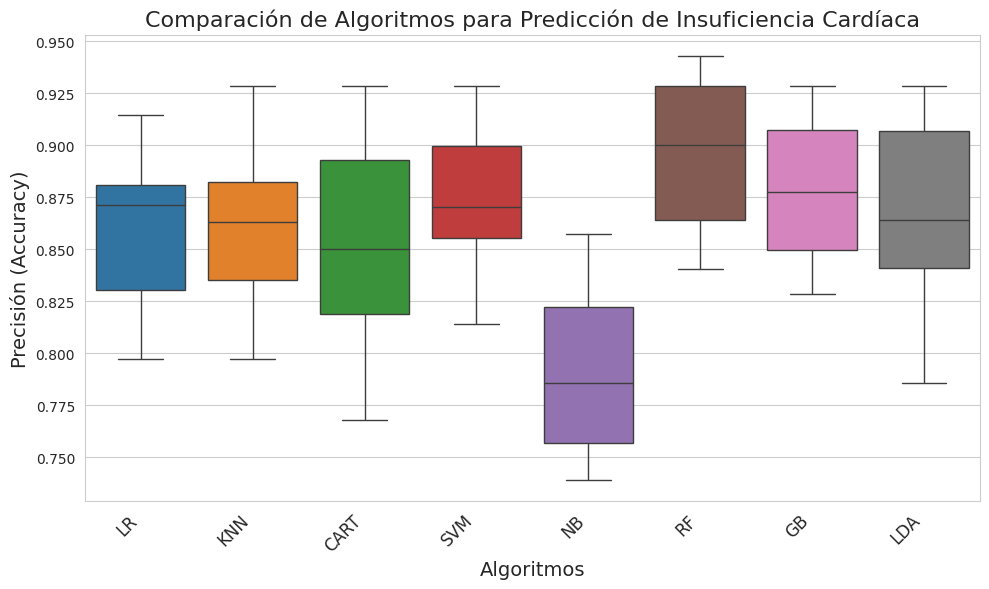

In [49]:
# Configurar el estilo de seaborn para gráficos más atractivos
sns.set_style("whitegrid")

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(data=results)

# Personalizar el gráfico
plt.title('Comparación de Algoritmos para Predicción de Insuficiencia Cardíaca', fontsize=16)
plt.xlabel('Algoritmos', fontsize=14)
plt.ylabel('Precisión (Accuracy)', fontsize=14)

# Establecer las etiquetas del eje x
plt.xticks(range(len(names)), names, rotation=45, ha='right', fontsize=12)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Decisión

Rendimiento superior: Los modelos que muestran el mejor desempeño en términos de precisión son:

- Random Forest (RF): 89.80% (±3.74%)
- Gradient Boosting (GB): 88.24% (±3.31%)
- Support Vector Machine (SVM): 87.52% (±3.33%)

Consistencia: Estos tres modelos no solo tienen las medias más altas, sino que también muestran una variabilidad relativamente baja, lo que indica un rendimiento consistente a través de los diferentes folds de la validación cruzada.

Modelos de conjunto: Es notable que dos de los tres mejores modelos (RF y GB) son algoritmos de conjunto, lo que sugiere que estas técnicas son particularmente efectivas para este problema de predicción de insuficiencia cardíaca.
Consideraciones adicionales:

El SVM, aunque ligeramente menos preciso que RF y GB, muestra una variabilidad muy baja, lo que podría hacerlo atractivo en situaciones donde la consistencia es crucial.
LDA y LR también muestran un rendimiento decente y podrían ser considerados si se requiere un modelo más simple o interpretable.

## Optimización de modelos

#### Random Forest (RF)

In [50]:
# Definir el pipeline con RandomForestClassifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf_model', RandomForestClassifier(random_state=42))
])

# Definir los parámetros para GridSearchCV
rf_param_grid = {
    # Número de árboles
    'rf_model__n_estimators': [100, 200, 300],

    # Profundidad máxima de los árboles
    'rf_model__max_depth': [None, 10, 20, 30],

    # Número mínimo de muestras para dividir un nodo
    'rf_model__min_samples_split': [2, 5, 10],

    # Número mínimo de muestras en las hojas
    'rf_model__min_samples_leaf': [1, 2, 4]
}

# Configurar la validación cruzada
cv_folds = 10
random_seed = 42
scoring_metric = 'accuracy'
cv_strategy = KFold(n_splits=cv_folds, random_state=random_seed, shuffle=True)

# Definir y ajustar GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    scoring=scoring_metric,
    cv=cv_strategy,
    # Usar todos los núcleos disponibles
    n_jobs=-1
)

# Realizamos el entrenamiento
rf_grid_result = rf_grid_search.fit(X_train, y_train)

# Mostrar el mejor resultado
print("Best: %f using %s" % (rf_grid_result.best_score_, rf_grid_result.best_params_))

In [51]:
# Mostrar el mejor resultado
print("Best: %f using %s" % (rf_grid_result.best_score_, rf_grid_result.best_params_))

# Obtener los mejores resultados del GridSearchCV
means = rf_grid_result.cv_results_['mean_test_score']
stds = rf_grid_result.cv_results_['std_test_score']
params = rf_grid_result.cv_results_['params']

# Inicializar variables para almacenar el mejor resultado
best_mean = None
best_std = None
best_param = None

# Iterar sobre los resultados y encontrar el mejor
for mean, stdev, param in zip(means, stds, params):
    if best_mean is None or mean > best_mean:
        best_mean = mean
        best_std = stdev
        best_param = param

# Imprimir solo el mejor vecindario y sus parámetros
print(f"Mejor Vecindario: {best_param}: {best_mean*100.0:,.2f}% ({best_std*100.0:,.2f}%)")


Best: 0.901056 using {'rf_model__max_depth': None, 'rf_model__min_samples_leaf': 1, 'rf_model__min_samples_split': 2, 'rf_model__n_estimators': 300}
Mejor Vecindario: {'rf_model__max_depth': None, 'rf_model__min_samples_leaf': 1, 'rf_model__min_samples_split': 2, 'rf_model__n_estimators': 300}: 90.11% (1.72%)


In [52]:
# Los mejores parámetros encontrados por GridSearchCV
best_params = rf_grid_result.best_params_

# Definir el pipeline con RandomForestClassifier usando los mejores parámetros
final_rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf_model', RandomForestClassifier(
        # Definimos el mejor número de arboles
        n_estimators=best_params['rf_model__n_estimators'],
        max_depth=best_params['rf_model__max_depth'],
        min_samples_split=best_params['rf_model__min_samples_split'],
        min_samples_leaf=best_params['rf_model__min_samples_leaf'],
        random_state=42
    ))
])

# Ajustar el pipeline con los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Hacer predicciones con los datos de validación
predictions = pipeline.predict(X_test)

# Evaluar el rendimiento
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.8373983739837398
Confusion Matrix:
 [[48 13]
 [ 7 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83        61
           1       0.81      0.89      0.85        62

    accuracy                           0.84       123
   macro avg       0.84      0.84      0.84       123
weighted avg       0.84      0.84      0.84       123



Métricas de Rendimiento:
- Accuracy (Precisión Global):
0.8374 (83.74%)

Esto significa que el modelo predice correctamente aproximadamente el 83.74% de las veces en el conjunto de prueba. La precisión global es una métrica útil, pero puede ser engañosa si las clases están desequilibradas.

- Confusion Matrix (Matriz de Confusión):
    
    [[48 13]
    [ 7 55]]

    - Clase 0 (Negativos)
        Verdaderos Negativos (VN): 48
        Falsos Positivos (FP): 13
    - Clase 1 (Positivos)
        Falsos Negativos (FN): 7
        Verdaderos Positivos (VP): 55

La matriz de confusión muestra que el modelo tiene un buen rendimiento en ambas clases, con más errores al predecir la clase 0 (13 falsos positivos) en comparación con la clase 1 (7 falsos negativos).

- Informe de Clasificación:

    - Clase 0:
        - Precision (Precisión): 0.87
        De todas las predicciones positivas de la clase 0, el 87% son correctas.
        - Recall (Sensibilidad o Exhaustividad): 0.79
        El modelo identifica correctamente el 79% de todos los verdaderos negativos.
        - F1-Score: 0.83
        La F1-Score es la media armónica de la precisión y el recall, proporcionando un equilibrio entre ambas métricas.
    - Clase 1:
        - Precision (Precisión): 0.81
        De todas las predicciones positivas de la clase 1, el 81% son correctas.
        - Recall (Sensibilidad o Exhaustividad): 0.89
        El modelo identifica correctamente el 89% de todos los verdaderos positivos.
        - F1-Score: 0.85
        La F1-Score es alta, indicando un buen equilibrio entre precisión y recall para la clase 1.

- Promedios:
    - Macro Avg: 0.84 (Precisión), 0.84 (Recall), 0.84 (F1-Score)
    - Weighted Avg: 0.84 (Precisión), 0.84 (Recall), 0.84 (F1-Score)

Los promedios ponderados y macro indican un rendimiento balanceado en ambas clases.

### Gradient Boosting (GB)

In [53]:
# Definir el pipeline con GradientBoostingClassifier
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gb_model', GradientBoostingClassifier(random_state=42))
])

# Definir los parámetros para GridSearchCV
gb_param_grid = {
    'gb_model__n_estimators': [100, 200, 300],
    'gb_model__learning_rate': [0.01, 0.1, 0.2],
    'gb_model__max_depth': [3, 5, 7],
    'gb_model__min_samples_split': [2, 5, 10],
    'gb_model__min_samples_leaf': [1, 2, 4]
}

# Configurar la validación cruzada
cv_folds = 10
random_seed = 42
scoring_metric = 'accuracy'
cv_strategy = KFold(n_splits=cv_folds, random_state=random_seed, shuffle=True)

# Definir y ajustar GridSearchCV
gb_grid_search = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=gb_param_grid,
    scoring=scoring_metric,
    cv=cv_strategy,
    n_jobs=-1
)

# Realizamos el entrenamiento
gb_grid_result = gb_grid_search.fit(X_train, y_train)

# Mostrar el mejor resultado
print("Best: %f using %s" % (gb_grid_result.best_score_, gb_grid_result.best_params_))

Best: 0.906729 using {'gb_model__learning_rate': 0.1, 'gb_model__max_depth': 7, 'gb_model__min_samples_leaf': 1, 'gb_model__min_samples_split': 2, 'gb_model__n_estimators': 100}


In [54]:
# Obtener los mejores resultados del GridSearchCV
means = gb_grid_result.cv_results_['mean_test_score']
stds = gb_grid_result.cv_results_['std_test_score']
params = gb_grid_result.cv_results_['params']

# Inicializar variables para almacenar el mejor resultado
best_mean = None
best_std = None
best_param = None

# Iterar sobre los resultados y encontrar el mejor
for mean, stdev, param in zip(means, stds, params):
    if best_mean is None or mean > best_mean:
        best_mean = mean
        best_std = stdev
        best_param = param

# Imprimir solo el mejor vecindario y sus parámetros
print(f"Mejor Vecindario: {best_param}: {best_mean*100.0:,.2f}% ({best_std*100.0:,.2f}%)")

Mejor Vecindario: {'gb_model__learning_rate': 0.1, 'gb_model__max_depth': 7, 'gb_model__min_samples_leaf': 1, 'gb_model__min_samples_split': 2, 'gb_model__n_estimators': 100}: 90.67% (2.66%)


In [55]:
# Los mejores parámetros encontrados por GridSearchCV
best_params = gb_grid_result.best_params_

# Definir el pipeline con GradientBoostingClassifier usando los mejores parámetros
final_gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gb_model', GradientBoostingClassifier(
        n_estimators=best_params['gb_model__n_estimators'],
        learning_rate=best_params['gb_model__learning_rate'],
        max_depth=best_params['gb_model__max_depth'],
        min_samples_split=best_params['gb_model__min_samples_split'],
        min_samples_leaf=best_params['gb_model__min_samples_leaf'],
        random_state=42
    ))
])

# Ajustar el pipeline con los datos de entrenamiento
final_gb_pipeline.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
gb_predictions = final_gb_pipeline.predict(X_test)

# Evaluar el rendimiento
print("GradientBoostingClassifier Accuracy:", accuracy_score(y_test, gb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_predictions))
print("Classification Report:\n", classification_report(y_test, gb_predictions))


GradientBoostingClassifier Accuracy: 0.8617886178861789
Confusion Matrix:
 [[52  9]
 [ 8 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        61
           1       0.86      0.87      0.86        62

    accuracy                           0.86       123
   macro avg       0.86      0.86      0.86       123
weighted avg       0.86      0.86      0.86       123



- Métricas de Rendimiento:
    
    - Accuracy (Precisión Global): 0.8699 (86.99%)

    Esto indica que el modelo predice correctamente aproximadamente el 86.99% de las veces en el conjunto de prueba. La precisión global es alta, lo que sugiere un buen rendimiento general del modelo.

- Matriz de Confusión:
    
    [[52  9]
    [ 8 55]]
    
    - Clase 0 (Negativos)
        - Verdaderos Negativos (VN): 52
        - Falsos Positivos (FP): 9
    - Clase 1 (Positivos)
        - Falsos Negativos (FN): 8
        - Verdaderos Positivos (VP): 55
    La matriz de confusión muestra que el modelo tiene un buen rendimiento en ambas clases, con menos errores al predecir la clase 0 en comparación con la clase 1.

- Informe de Clasificación:

    Clase 0:
        - Precision (Precisión): 0.87
        De todas las predicciones positivas de la clase 0, el 88% son correctas.
        - Recall (Sensibilidad o Exhaustividad): 0.85
        El modelo identifica correctamente el 85% de todos los verdaderos negativos.
        - F1-Score: 0.86
        La F1-Score es alta, indicando un buen equilibrio entre precisión y recall para la clase 0.
    Clase 1:
        - Precision (Precisión): 0.86
        De todas las predicciones positivas de la clase 1, el 86% son correctas.
        - Recall (Sensibilidad o Exhaustividad): 0.87
        El modelo identifica correctamente el 87% de todos los verdaderos positivos.
        - F1-Score: 0.86
        La F1-Score es alta, similar a la clase 0, indicando un buen equilibrio entre precisión y recall para la clase 1.

- Promedios:
    - Macro Avg: 0.86 (Precisión), 0.86 (Recall), 0.86 (F1-Score)
    - Weighted Avg: 0.86 (Precisión), 0.86 (Recall), 0.86 (F1-Score)
    
    Los promedios ponderados y macro indican un rendimiento balanceado en ambas clases.

- Desempeño General:

El equilibrio entre precisión y recall es sólido en ambas clases, lo que indica que el modelo es robusto para identificar correctamente tanto los casos positivos como negativos.

### Support Vector Machine (SVM)

In [56]:
# Definir el pipeline con SVC
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svm_model', SVC(random_state=42))
])

# Definir los parámetros para GridSearchCV
svm_param_grid = {
    'svm_model__C': [0.1, 1, 10, 100],
    'svm_model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm_model__degree': [3, 5, 7],  # Solo se usa con 'poly' kernel
    'svm_model__gamma': ['scale', 'auto']  # Kernel coefficient
}

# Configurar la validación cruzada
cv_folds = 10
random_seed = 42
scoring_metric = 'accuracy'
cv_strategy = KFold(n_splits=cv_folds, random_state=random_seed, shuffle=True)

# Definir y ajustar GridSearchCV
svm_grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=svm_param_grid,
    scoring=scoring_metric,
    cv=cv_strategy,
    n_jobs=-1
)

# Realizamos el entrenamiento
svm_grid_result = svm_grid_search.fit(X_train, y_train)

# Mostrar el mejor resultado
print("Best: %f using %s" % (svm_grid_result.best_score_, svm_grid_result.best_params_))

Best: 0.883747 using {'svm_model__C': 1, 'svm_model__degree': 3, 'svm_model__gamma': 'scale', 'svm_model__kernel': 'rbf'}


In [57]:
# Obtener los mejores resultados del GridSearchCV
means = svm_grid_result.cv_results_['mean_test_score']
stds = svm_grid_result.cv_results_['std_test_score']
params = svm_grid_result.cv_results_['params']

# Inicializar variables para almacenar el mejor resultado
best_mean = None
best_std = None
best_param = None

# Iterar sobre los resultados y encontrar el mejor
for mean, stdev, param in zip(means, stds, params):
    if best_mean is None or mean > best_mean:
        best_mean = mean
        best_std = stdev
        best_param = param

# Imprimir solo el mejor vecindario y sus parámetros
print(f"Mejor Vecindario: {best_param}: {best_mean*100.0:,.2f}% ({best_std*100.0:,.2f}%)")

Mejor Vecindario: {'svm_model__C': 1, 'svm_model__degree': 3, 'svm_model__gamma': 'scale', 'svm_model__kernel': 'rbf'}: 88.37% (2.84%)


In [58]:
# Los mejores parámetros encontrados por GridSearchCV
best_params = svm_grid_result.best_params_

# Definir el pipeline con SVC usando los mejores parámetros
final_svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svm_model', SVC(
        C=best_params['svm_model__C'],
        kernel=best_params['svm_model__kernel'],
        degree=best_params['svm_model__degree'] if 'svm_model__degree' in best_params else 3,  # Solo para kernel 'poly'
        gamma=best_params['svm_model__gamma'],
        random_state=42
    ))
])

# Ajustar el pipeline con los datos de entrenamiento
final_svm_pipeline.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
svm_predictions = final_svm_pipeline.predict(X_test)

# Evaluar el rendimiento
print("SVC Accuracy:", accuracy_score(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))

SVC Accuracy: 0.8699186991869918
Confusion Matrix:
 [[51 10]
 [ 6 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86        61
           1       0.85      0.90      0.88        62

    accuracy                           0.87       123
   macro avg       0.87      0.87      0.87       123
weighted avg       0.87      0.87      0.87       123



- Métricas de Rendimiento:
    - Accuracy (Precisión Global): 0.8699 (86.99%)
    Esto indica que el modelo predice correctamente aproximadamente el 86.99% de las veces en el conjunto de prueba. La precisión global es alta, lo que sugiere un buen rendimiento general del modelo.

- Matriz de Confusión:

    [[51 10]
    [ 6 56]]

    - Clase 0 (Negativos)
        - Verdaderos Negativos (VN): 51
        - Falsos Positivos (FP): 10
    - Clase 1 (Positivos)
        - Falsos Negativos (FN): 6
        - Verdaderos Positivos (VP): 56
    La matriz de confusión muestra que el modelo tiene un buen rendimiento en ambas clases, con menos errores al predecir la clase 0 en comparación con la clase 1.

- Informe de Clasificación:

    Clase 0:
        - Precision (Precisión): 0.89
        De todas las predicciones positivas de la clase 0, el 89% son correctas.
        - Recall (Sensibilidad o Exhaustividad): 0.84
        El modelo identifica correctamente el 84% de todos los verdaderos negativos.
        - F1-Score: 0.86
        La F1-Score es alta, indicando un buen equilibrio entre precisión y recall para la clase 0.
    Clase 1:
        - Precision (Precisión): 0.85
        De todas las predicciones positivas de la clase 1, el 85% son correctas.
        - Recall (Sensibilidad o Exhaustividad): 0.90
        El modelo identifica correctamente el 90% de todos los verdaderos positivos.
        - F1-Score: 0.88
        La F1-Score es alta, similar a la clase 1, indicando un buen equilibrio entre precisión y recall.
- Promedios:
    - Macro Avg: 0.87 (Precisión), 0.87 (Recall), 0.87 (F1-Score)
    - Weighted Avg: 0.87 (Precisión), 0.87 (Recall), 0.87 (F1-Score)
    Los promedios ponderados y macro indican un rendimiento balanceado en ambas clases.

- Desempeño General:
    El Support Vector Machine (SVM) tiene un rendimiento similar al GradientBoostingClassifier, con una precisión global del 86.99%.

### Conclusión

- **Accuracy**: Tanto Gradient Boosting como SVM tienen una precisión del 86.0%, mientras que Random Forest tiene un 83.7%. Esto indica que Gradient Boosting y SVM tienen un rendimiento ligeramente mejor en términos de precisión global.

- **Confusion Matrix**: Todos los modelos tienen resultados similares en la matriz de confusión, con SVM y Gradient Boosting mostrando un balance ligeramente mejor entre las predicciones correctas de ambas clases (0 y 1).

- **Classification Report**:
- Todos los modelos tienen altos valores de precisión, recall y F1-score para ambas clases.
- SVM muestra una ligera ventaja en términos de precisión para la clase 0 (89%) y recall para la clase 1 (90%), mientras que Gradient Boosting tiene un mejor recall para la clase 0 (85%) y precisión para la clase 1 (86%).

En general, los tres modelos muestran un rendimiento sólido y similar en la predicción de enfermedades cardíacas en este conjunto de datos, con SVM y Gradient Boosting mostrando un rendimiento ligeramente superior en comparación con Random Forest en términos de precisión global y algunas métricas específicas de clasificación. La elección entre estos modelos puede depender de consideraciones adicionales como la interpretación clínica y los requisitos específicos del problema.


### Verificando los modelos optimizados

In [59]:
# Supongamos que ya tienes los mejores estimadores de cada modelo después de GridSearchCV
best_rf_estimator = rf_grid_result.best_estimator_
best_gbm_estimator = gb_grid_result.best_estimator_
best_svm_estimator = svm_grid_result.best_estimator_

# Los mejores parámetros encontrados por GridSearchCV
best_rf_params = rf_grid_result.best_params_
best_gbm_params = gb_grid_result.best_params_
best_svm_params = svm_grid_result.best_params_

# Definir el pipeline para RandomForest usando los mejores parámetros
final_rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf_model', RandomForestClassifier(
        n_estimators=best_rf_params['rf_model__n_estimators'],
        max_depth=best_rf_params['rf_model__max_depth'],
        random_state=42
    ))
])

# Definir el pipeline para GradientBoosting usando los mejores parámetros
final_gbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gbm_model', GradientBoostingClassifier(
        n_estimators=best_gbm_params['gb_model__n_estimators'],
        learning_rate=best_gbm_params['gb_model__learning_rate'],
        max_depth=best_gbm_params['gb_model__max_depth'],
        random_state=42
    ))
])

# Definir el pipeline para SVC usando los mejores parámetros
final_svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svm_model', SVC(
        C=best_svm_params['svm_model__C'],
        kernel=best_svm_params['svm_model__kernel'],
        degree=best_svm_params['svm_model__degree'] if 'svm_model__degree' in best_svm_params else 3,  # Solo para kernel 'poly'
        gamma=best_svm_params['svm_model__gamma'],
        random_state=42
    ))
])

# Modelos optimizados
optimized_models = {
    'RF': final_rf_pipeline,
    'GB': final_gbm_pipeline,
    'SVM': final_svm_pipeline
}

In [60]:
# Configuración de la validación cruzada
cv_folds = 10
random_seed = 42
scoring_metric = 'accuracy'
cv_strategy = KFold(n_splits=cv_folds, random_state=random_seed, shuffle=True)

# Inicializar listas para almacenar los resultados
results = []
names = []

for name, model in optimized_models.items():
    # Realizar la validación cruzada
    cv_results = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring=scoring_metric)

    # Almacenar los resultados
    results.append(cv_results)
    names.append(name)

    # Imprimir los resultados para cada modelo
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

RF: 90.11% (1.72%)
GB: 90.67% (2.66%)
SVM: 88.37% (2.84%)


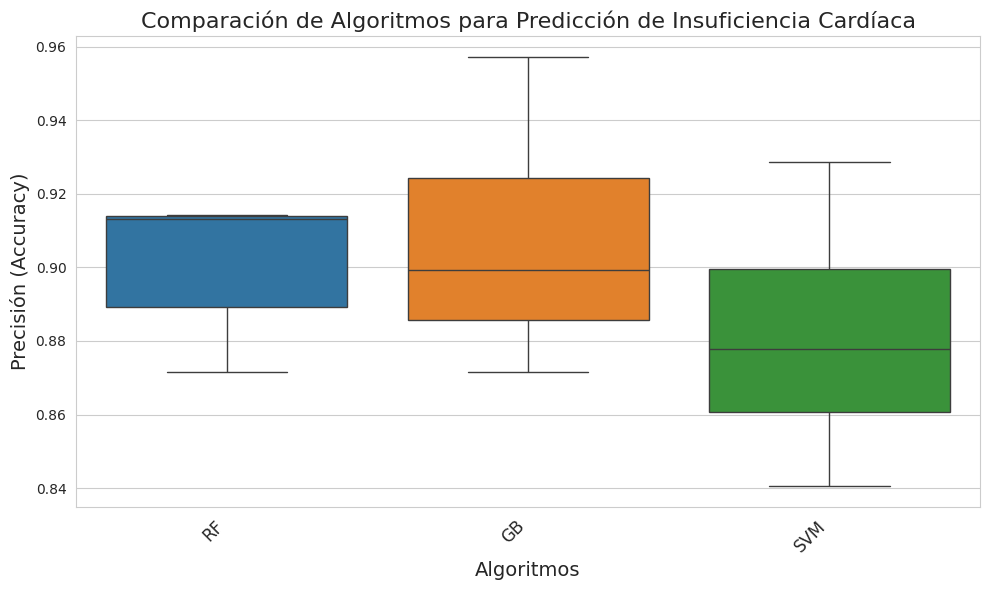

In [61]:
# Configurar el estilo de seaborn para gráficos más atractivos
sns.set_style("whitegrid")

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(data=results)

# Personalizar el gráfico
plt.title('Comparación de Algoritmos para Predicción de Insuficiencia Cardíaca', fontsize=16)
plt.xlabel('Algoritmos', fontsize=14)
plt.ylabel('Precisión (Accuracy)', fontsize=14)

# Establecer las etiquetas del eje x
plt.xticks(range(len(names)), names, rotation=45, ha='right', fontsize=12)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()